<a href="https://colab.research.google.com/github/axelpuyo/liasd/blob/master/perceptive_bias_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Run once
!pip install import-ipynb

import os
from google.colab import drive
print(os.getcwd())
print(os.listdir())

#%cd your_path/Colab Notebooks
%cd drive/MyDrive/Colab Notebooks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content
['.config', 'drive', 'sample_data']
/content/drive/MyDrive/Colab Notebooks


importing Jupyter notebook from explainers.ipynb
importing Jupyter notebook from colored_mnist.ipynb


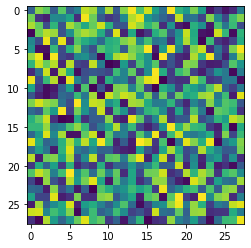

In [3]:
import cv2
import import_ipynb
import explainers
import colored_mnist

import numpy as np
import random as rd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [4]:
def uncategoric(lab):
  names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'r', 'g', 'b'])
  numbers = np.array([i for i in range(13)])
  idx = (lab == 1)
  return str(names[idx == True]), int(numbers[idx == True])

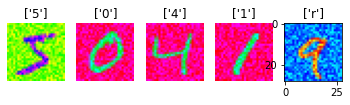

In [5]:
(train_images, train_colors, train_numbers, train_mixed), (test_images, test_colors, test_numbers, test_mixed) = colored_mnist.load_data(8000)

for i in range(5):
  plt.axis('off')
  plt.subplot(1, 5, i + 1)
  plt.title(uncategoric(train_mixed[i])[0])
  plt.imshow(train_images[i])

In [6]:
# Color-biased model
color_model = keras.Sequential()
color_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
color_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
color_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
color_model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
color_model.add(keras.layers.Flatten())
color_model.add(keras.layers.Dense(3))
color_model.add(keras.layers.Softmax())

input_shape = train_images.shape
color_model.build(input_shape)

color_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# color_model.summary()

print('>> Color-biased model training')
color_model.fit(train_images, train_colors, batch_size=12, epochs=5)

>> Color-biased model training
Epoch 1/5
667/667 [==============================] - 9s 8ms/step - loss: 0.0084 - accuracy: 0.9967
Epoch 2/5
667/667 [==============================] - 5s 8ms/step - loss: 5.9605e-11 - accuracy: 1.0000
Epoch 3/5
667/667 [==============================] - 5s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
667/667 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
667/667 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [7]:
# Shape-biased model
shape_model = keras.Sequential()
shape_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
shape_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
shape_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
shape_model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
shape_model.add(keras.layers.Flatten())
shape_model.add(keras.layers.Dense(10))
shape_model.add(keras.layers.Softmax())

input_shape = train_images.shape
shape_model.build(input_shape)

shape_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# shape_model.summary()

print('>> Shape-biased model training')
shape_model.fit(train_images, train_numbers, batch_size=12, epochs=25, shuffle=True)

>> Shape-biased model training
Epoch 1/25
667/667 [==============================] - 4s 5ms/step - loss: 0.8686 - accuracy: 0.7172
Epoch 2/25
667/667 [==============================] - 3s 5ms/step - loss: 0.1744 - accuracy: 0.9480
Epoch 3/25
667/667 [==============================] - 3s 5ms/step - loss: 0.1232 - accuracy: 0.9624
Epoch 4/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0886 - accuracy: 0.9744
Epoch 5/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0711 - accuracy: 0.9770
Epoch 6/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0572 - accuracy: 0.9837
Epoch 7/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0439 - accuracy: 0.9872
Epoch 8/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0351 - accuracy: 0.9899
Epoch 9/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0279 - accuracy: 0.9920
Epoch 10/25
667/667 [==============================] - 3s 5ms/step - 

In [8]:
# Rule-biased model
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(13))
model.add(keras.layers.Softmax())

input_shape = train_images.shape
model.build(input_shape)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

print('>> Rule-biased model training')
model.fit(train_images, train_mixed, batch_size=12, epochs=25)

# model.save(path)

>> Rule-biased model training
Epoch 1/25
667/667 [==============================] - 4s 5ms/step - loss: 0.5077 - accuracy: 0.8344
Epoch 2/25
667/667 [==============================] - 3s 5ms/step - loss: 0.1280 - accuracy: 0.9635
Epoch 3/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0774 - accuracy: 0.9775
Epoch 4/25
667/667 [==============================] - 4s 6ms/step - loss: 0.0574 - accuracy: 0.9835
Epoch 5/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0416 - accuracy: 0.9871
Epoch 6/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 7/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 8/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0156 - accuracy: 0.9945
Epoch 9/25
667/667 [==============================] - 3s 5ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 10/25
667/667 [==============================] - 3s 5ms/step - l

In [9]:
def adversarial_tests():
  pass
  # # red_image = np.random.rand(1,28,28,3)
  # # red_image[..., 1] = red_image[..., 2] = 0
  # # plt.imshow(np.squeeze(red_image))
  # # plt.axis('off')
  # # plt.show()

  # # model.predict(red_image)

  # color_im = np.zeros((1,28,28,3))
  # color_im[0, 0, 0, 1] = 1
  # color_im[0, 0, 1:3, 2] = 1
  # # color_im[0, 5:12, 14:24, 2] = 1
  # # color_im[0, 13:24, 3:14, 2] = 1
  # plt.imshow(np.squeeze(color_im))
  # plt.show()
  # plt.imshow(np.squeeze(color_im[..., 1]), cmap='gray')
  # plt.colorbar()
  # plt.show()

  # print('>> Color')
  # color_model.predict(color_im)
  # # print('>> Shape')
  # # shape_model.predict(color_im)
  # # print('>> Normal')
  # # model.predict(color_im)

  # ## Grad-CAM+SHAP pour voir si ca s'allume autour ou au niveau du chiffre

  # # plt.imshow(np.squeeze(train_images[0]))
  # # plt.axis('off')
  # # plt.show()

  # # new_im = np.zeros((1,28,28,3))
  # # new_im[..., 2] = (1 - train_images[0, ..., 0])
  # # new_im[..., 1] = train_images[0, ..., 0]
  # # plt.imshow(np.squeeze(new_im)[..., 2], cmap='gray')
  # # plt.colorbar()
  # # plt.show()

  # # model.predict(new_im)

In [10]:
## CONFUSIONS
ims, labels = test_images, test_mixed
labs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'r', 'g', 'b']

n = 200
wrong_list = []
test_ims = ims[:n]
preds = model.predict(test_ims)
for i in range(test_ims.shape[0]):
  pred_max = max(preds[i]) # preds and ground are categorical, we must extract the number corresponding to the max value in the array.
  ground_max = max(labels[i])
  pred_value = list(preds[i]).index(pred_max)
  ground_value = list(labels[i]).index(ground_max)

  if pred_value != ground_value:
    print('predicted value: ', labs[pred_value], '  ground truth: ', labs[ground_value], ' <<')
    wrong_list.append((i, pred_value))
  else:
    print('predicted value: ', labs[pred_value] , '  ground truth: ', labs[ground_value])

predicted value:  7   ground truth:  7
predicted value:  2   ground truth:  2
predicted value:  1   ground truth:  1
predicted value:  0   ground truth:  0
predicted value:  r   ground truth:  r
predicted value:  1   ground truth:  1
predicted value:  r   ground truth:  r
predicted value:  9   ground truth:  9
predicted value:  r   ground truth:  r
predicted value:  9   ground truth:  9
predicted value:  0   ground truth:  0
predicted value:  r   ground truth:  r
predicted value:  r   ground truth:  r
predicted value:  0   ground truth:  0
predicted value:  1   ground truth:  1
predicted value:  5   ground truth:  5
predicted value:  r   ground truth:  r
predicted value:  7   ground truth:  7
predicted value:  3   ground truth:  3
predicted value:  4   ground truth:  4
predicted value:  r   ground truth:  r
predicted value:  6   ground truth:  6
predicted value:  r   ground truth:  r
predicted value:  5   ground truth:  5
predicted value:  r   ground truth:  r
predicted value:  r   gro

>> Wrongly classified :  3 / 200


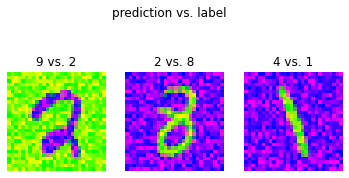

In [11]:
c, plots = 1, 1
print('>> Wrongly classified : ', len(wrong_list), '/', test_ims.shape[0])
plt.suptitle('prediction vs. label', y=0.9)
labs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'red', 'green', 'blue']
for (i, j) in wrong_list:
  ground_truth = list(test_numbers[i])
  max_val = max(ground_truth)
  true_label = ground_truth.index(max_val)
  pred_label = labs[j]

  if plots and wrong_list:
    plt.subplot(1, len(wrong_list), c)
    plt.title('{} vs. {}'.format(pred_label, true_label))
    plt.imshow(test_ims[i])
    plt.axis('off')
  c += 1

loss :  0.0
conv2d_4


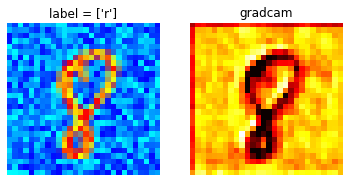

In [35]:
## POST-ANALYSIS
# if wrong_list: # THIS IS DEPRECATED
#   rgb_confusion = np.zeros((3,))
#   for (i, j) in wrong_list: # i : index of wrongly classified image in the test dataset, # j : predicted label of that image.
#     im = test_ims[i]
#     for k in range(3):
#       if im[..., k].any():
#         rgb_confusion[k] += 1

#   rgb_confusion /= len(wrong_list)
#   pie_labels = ['red', 'green', 'blue']
#   plt.pie(rgb_confusion, labels = pie_labels, colors = pie_labels, autopct='%1.1f%%')
#   plt.title('is misclassification linked to color?')
#   plt.show()
explainer = 'cam'

if __name__ == '__main__': # works great
  idx = np.random.randint(0, 2000)
  test_img = test_images[idx]
  test_lab = test_mixed[idx]

  plt.subplot(1, 2, 1)
  plt.title('label = {}'.format(str(uncategoric(test_lab)[0])))
  plt.imshow(test_img)
  plt.axis('off')

  if explainer == 'cam':
    print('loss : ', model.evaluate(test_img[np.newaxis], test_lab[np.newaxis], verbose=0)[0])
    plt.subplot(1, 2, 2)
    plt.imshow(explainers.gradcam(model, 'conv2d_4', test_img[np.newaxis]), cmap='hot')
    plt.title('gradcam')
    plt.axis('off')
    plt.show()

  elif explainer == 'rise': # doesn't work very well
    num = 500
    idx = np.random.randint(0, 2000)
    proba = 3/4
    print('loss : ', model.evaluate(test_img[np.newaxis], test_lab[np.newaxis], verbose=0)[0])

    heatmap = explainers.rise(model, test_img, test_lab, num, proba)

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap, cmap='hot')
    plt.title('rise')
    plt.axis('off')
    plt.show()
    
  elif explainer == 'shap':
    pass

  else:
    pass

In [13]:
## REPRESENTATIONAL SIMILARITY ANALYSIS
from keras.models import Model

# del f_map
models = [color_model, shape_model, model]
model_names = ['Color-biased model', 'Shape-biased model', 'Rule-biased model']
im = train_images[0]
if im.ndim < 4:
  im = np.expand_dims(im, axis=0)

f_map = [[],[],[]]
for (n, model) in enumerate(models):
  print(model_names[n])
  for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
      continue
    model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)

    kernels, biases = model.layers[i].get_weights()
    k_min, k_max = kernels.min(), kernels.max()
    kernels = (kernels - k_min) / (k_max - k_min)
    feature_map = model2.predict(im)

    # f_map = np.squeeze(feature_map[..., 0])
    # kernel = np.squeeze(kernels[..., 0, 0]) # Ce zéro est suspect, on ne sait pas si ce feature map vient forcément du 1er input du convolutional layer d'avant.

    # print(model.layers[i].name, kernels.shape)
    # plt.figure(figsize=(20,5))
    # plt.subplot(131)
    # plt.imshow(np.squeeze(im), aspect='auto')
    # plt.colorbar()
    # plt.subplot(132)
    # plt.imshow(kernel, aspect='auto')
    # plt.colorbar()
    # plt.subplot(133)
    # plt.imshow(f_map, aspect='auto')
    # plt.colorbar()
    # plt.show()
    # Visualize all feature maps and corresponding filters.
    num_maps = feature_map.shape[-1]
    rows = int(np.floor(np.sqrt(num_maps)))
    idx = 1
    # plt.figure(figsize=(20, 10))
    print(model.layers[i].name, kernels.shape)
    for j in range(0, num_maps, 8):
      # print(num_maps, idx, rows*2*rows)
      f_map[n].append(np.squeeze(feature_map[..., j]))
      kernel = np.squeeze(kernels[..., 0, j]) # Ce zéro est suspect : revoir les shape des kernels.

      if n == 2:
        print(np.array(f_map).shape)
        print('color_bias : ', np.corrcoef(f_map[0][-1], f_map[2][-1]))
        print('shape_bias : ', np.corrcoef(f_map[1][-1], f_map[2][-1]))
      # plt.subplot(2, 8, idx)
      # plt.imshow(kernel, aspect='auto')
      # plt.subplot(2, 8, idx + 1)
      # plt.imshow(f_map, aspect='auto')

      idx += 2
    # plt.show()
  pass # use feature map analysis code developed last week

Color-biased model
conv2d (3, 3, 3, 64)
conv2d_1 (3, 3, 64, 64)
Shape-biased model
conv2d_2 (3, 3, 3, 64)
conv2d_3 (3, 3, 64, 64)
Rule-biased model
conv2d_4 (3, 3, 3, 64)
(3,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: ignored